# EE 538: Low-Noise Analog Circuit Design
## Spring 2021
## Instructor: Jason Silver

## Announcements

 - Design project presentations next Wednesday (June 2)
     - Final report due Friday, June 11 at midnight
 - Midterm solutions posted
     - Midterm grades coming soon

## Week 9

 - Analog MOS Integrated Circuits for Signal Processing, Gregorian & Temes
 - CMOS Mixed-Signal Circuit Design, $2^{nd}$ edition, R. Jacob Baker
 - Circuit Techniques for Reducing the Effects of Op-Amp Imperfections, Enz & Gregorian
 - Simulating Switched-Capacitor Filters with SpectreRF, Ken Kundert

## Overview

 - Last time...
     - Sampled-data systems
     - Aliasing
     - Track-and-hold noise
     - Switched-capacitor design
     - Integrator noise
 - Today...
    - MOS amplifier error sources
    - Autozeroing (AZ)
        - Effect on $1/f$ noise
        - Effect on white noise
    - Chopper stabilization
    - Switched-capacitor gain structures
    - Other sources of error

## Python packages/modules

In [24]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
import numpy as np
from scipy import signal
from scipy import integrate
from scipy.fft import fft
#%matplotlib notebook

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_2xy(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.plot(x, y1, 'b', label=y1label)
    ax.plot(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )
    
def plot_3xy(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.plot(x, y1, 'b', label=y1label)
    ax.plot(x, y2, 'r', label=y2label)
    ax.plot(x, y3, 'g', label=y3label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  

def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)    
    
def plot_log3xy(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.semilogx(x, y3, 'g', label=y3label)  
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_log2xy(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
def plot_loglog2(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.loglog(x, y1, 'b', label=y1label)
    ax.loglog(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_NF_vs_Rs(en_vals, in_vals, Rs_min, Rs_max, T_in_K):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    F1 = 1 + (en_vals[0]**2+Rs**2*in_vals[0]**2)/(4*k*T_in_K*Rs)
    F2 = 1 + (en_vals[1]**2+Rs**2*in_vals[1]**2)/(4*k*T_in_K*Rs)
    F3 = 1 + (en_vals[2]**2+Rs**2*in_vals[2]**2)/(4*k*T_in_K*Rs)
    ax.semilogx(Rs, 10*np.log10(F1), 'b', label=r'$e_{n1}$, $i_{n1}$')
    ax.semilogx(Rs, 10*np.log10(F2), 'r', label=r'$e_{n2}$, $i_{n2}$')
    ax.semilogx(Rs, 10*np.log10(F3), 'g', label=r'$e_{n3}$, $i_{n3}$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Noise Figure $NF$ [$dB$]')  
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_noise_curve(e_n, i_n, Rs_min, Rs_max):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    e_ni_2 = 4*k*T*Rs + e_n**2 + i_n**2*Rs**2
    ax.loglog(Rs, np.sqrt(e_ni_2), 'b', label='Total Noise')
    ax.loglog(Rs, np.sqrt(4*k*T*Rs), 'r', label=r'$\sqrt{4kTR_s}$')
    ax.loglog(Rs, e_n*np.ones(np.size(Rs)), 'g', label=r'$e_n$')
    ax.loglog(Rs, i_n*Rs, 'y', label=r'$i_n R_s$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Equivalent Input Noise [$V/\sqrt{Hz}$]')
    
    ax.legend()
    ax.legend(loc='upper center', ncol=4, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )   
    
def plot_bjt_NF(beta, r_bb, Rmin, Rmax, Imin, Imax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    T = 300
    q = 1.602e-19
    V_T = k*T/q
    rs = np.logspace(np.log10(Rmin), np.log10(Rmax), num = 100)
    ic = np.logspace(np.log10(Imin), np.log10(Imax), num = 100)
    I_C, R_S = np.meshgrid(ic, rs)
    e_n_2 = 4*k*T*(V_T/2/I_C + r_bb)
    i_n_2 = 2*q*I_C/beta_0
    NF = 1 + (e_n_2 + i_n_2*R_S**2)/(4*k*T*R_S)
    cp = ax.contourf(I_C, R_S, 10*np.log10(NF), levels=np.linspace(0,15, num=16))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'Source Resistance $R_s$ [$\Omega$]')
    plt.xlabel(r'Collector Current $I_C$ [A]')
    fig.colorbar(cp)

def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

def fft_mag(x, N, T, t):
    fft_sig  = fft(x, N)  
    freqs = np.linspace(0.0, 1.0/(2.0*T), N//2)
    mags = 2.0/N * np.abs(fft_sig[0:N//2]) # single-sided FFT
    
    return freqs, mags

def plot_fft_dB(freqs, mags, fmin, fmax):
    fig, ax = plt.subplots(figsize = (10.0,7.5))
    ax.plot(1e-3*freqs, 20*np.log10(mags), 'b')
    ax.set_xlim(fmin, fmax)
    ax.set_xlabel('Frequency [kHz]')
    ax.set_ylabel('Magnitude [dB]')
    ax.grid()

# Lecture 9 - Opamp Error Reduction Techniques

## MOS operational amplifiers

<center><img src="img/MOS_opamp_errors.png" width=600 /></center>

 - Due to their low input current noise (which we can often assume is zero), MOS operational amplifiers are attractive for sensing applications involving high source impedance
 
 - However, both $1/f$ noise and offset voltage, typically negligible in BJT amplifiers, are significant sources of error in MOS opamps
 
 - Offset voltage arises due to mismatch in threshold voltage that occur due random variations in doping concentrations
 
 - $1/f$ noise can be catastrophic for low-frequency, low-bandwidth applications
 
 - Both sources of error add directly to any signal voltage, degrading SNR and dynamic range

## Input offset voltage

 - Nominally identical transistors, resistors, and capacitors suffer from random variability in their construction that results in finite differences in behavior
 
 - Device parameters are typically modeled as normally-distributed random variables
 
 - For MOS transistors, threshold voltage *mismatch* can be quantified in terms of its variance, which depends inversely on transistor gate area $WL$ and is proportional to an empirical coefficent derived from device measurements
 
\begin{equation}
\sigma_{V_{T0}}^2 = \dfrac{A_{V_{T0}}^2}{WL}
\end{equation}

 - $A_{V_{T0}}$ is a process constant, while $W$ and $L$ can be selected by the chip designer to minimize offset, at the expense of increased input capacitance

<center><img src="img/MOS_OTA_offset.png" width=500 /></center>

<center><img src="img/MOS_OTA_input_offset.png" width=500 /></center>

 - In an amplifier with differential inputs, threshold voltage mismatch manifests as an error in the differential DC bias current of the input pair
 
 - In open-loop (left), the current error $\Delta I_D$ becomes an output voltage error $v_{os,out}$ (which due to high open-loop gain is typically large enough to saturate an opamp's output voltage)
 
 - When an opamp is connected in feedback (right), the active current mirror causes the differential bias currents to equalize, forcing a voltage of $v_{os}$ at the gate of $M_2$

<center><img src="img/opamp_offset_model.png" width=600 /></center>

 - The opamp is modeled as an offset-free amplifier driven by an input-voltage $v_{os}$
 
 - The *input-referred offset* sets the minimum bound on the opamp's ability to resolve small DC inputs (i.e. the DC output voltage is only accurate to within the opamp's $v_{os}$, divided by the feedback factor $\beta$)
 
 - For MOS amplifiers with no offset compensation, typical offset values are from $1 - 10 \:\text{mV}$
 
 - Offset may not be a problem for applications that do not require DC precision, but care must be taken that input offset does not lead to amplifier saturation for high-gain signal paths

## 1/f noise

 - $1/f$ noise, due to the slow nature of its fluctuations relative to white noise, allows the potential for compensation using similar techniques to those used to compensate for offset (to be discussed shortly)
 
 - Recall that noise power spectral density is the Fourier transform of its autocorrelation function, which expresses the correlation between values of the noise process observed $\tau$ seconds apart 
 
\begin{equation}
R_{xx}(\tau) = E[x(t)x(t+\tau)] = \lim_{T\to\infty}\dfrac{1}{2T}\int_{-T}^{T}x(t)x(t+\tau)dt 
\end{equation}
 
 
 - For white noise, the autocorrelation function is an impulse at $\tau = 0$, corresponding to zero correlation between successive noise values down to arbitrarily small values of $\tau$ (the Fourier transform of an impulse function $\delta (t)$ is a constant) 
 
 - The $1/f$ dependence of flicker noise PSD reveals a strong correlation between noise samples taken at different points in time, and this correlation increases as the interval $\tau \rightarrow 0$ 
 
 - That is, if the observation interval $\tau$ is small, a $1/f$ noise process will vary little from one observation to the next (we will exploit this)

 - Recall that $1/f$ drain current noise of a MOSFET can be expressed as
 
\begin{equation}
i_{nf}^2 = \dfrac{K_f}{f}\cdot\dfrac{g_m^2}{WLC_{ox}}
\end{equation}

 - Note from this expression that, like input offset, reduction of $1/f$ noise can also be accomplished by an increase in the gate area of the MOSFET
 
 - In general, the noise performance of an opamp is limited by input transistor pair, so reduction of both raw input offset and $1/f$ noise is achieved in opamp ICs by the use of large gate areas (again, at the expense of increase input capacitance and hence reduced bandwidth)

## Auto-zeroing (AZ)

<center><img src="img/auto_zeroing_amplifier.png" width=800 /></center>

 - One method of compensating for opamp errors is auto-zeroing, which relies on sampling the error(s) during one clock phase and subtracting it during another
 
 - In the implementation depicted here, the error $v_{os} + v_n$ is sampled onto the capacitor $C$ during the sampling phase ($\phi_1$), and connected in series with the original error (with opposite polarity) during the amplification phase ($\phi_2$)
 
 - Note that a separate feedback path (not shown) is required to realize the desired closed-loop gain

## Sampling phase

<center><img src="img/auto_zeroing_phi1.png" width=1000 /></center>

 - During the sampling phase, $\phi_1$, the opamp is connected in unity-feedback and the input voltage error $v_n + v_{os}$ is sampled onto the capacitor $C$
 
 - The switch connected to the bottom plate of the capacitor ensures that the polarity of voltage sampled onto the capacitor is opposite that of the original input-referred voltage error
 
 - Finite gain of the opamp will result in a slight mismatch between the sampled voltage and the original error, but this is typically negligible
 
 - Note that the opamp must be unity-gain stable if this approach is used

## Signal-processing phase

<center><img src="img/auto_zeroing_phi2.png" width=1000 /></center>

 - At the end of the sampling phase, the switches controlled by $\phi_1$ are opened and the input switches controlled by $\phi_2$ are closed
 
 - The sampled error voltage is maintained on the capacitor with a polarity opposite that of the opamp error voltage
 
 - If the opamp error voltage does not change between the sampling phase and the signal-processing phase, the auto-zeroed opamp is ready for error-free processing of the input voltage $v_p - v_m$ 
 
 - Note that due to the two-phase operation of auto-zeroing, the opamp is only available for amplification during $\phi_2$

## Simplified AZ model

<center><img src="img/AZ_simple_model.png" width=1000 /></center>

 - In the simplified model shown here, the error voltage $v_{err} = v_{os} + v_n$ is sampled onto the capacitor $C$ during the sampling phase $T_{AZ}$ (assume $RC\ll T_{AZ}$ so the full error voltage is sampled onto $C$) every $T_s$ seconds
 
 - During the hold phase $T_h$, the voltage across the switch is 
 
\begin{equation} 
v_{AZ} = v_{err} - v_c
\end{equation}

 - The AZ voltage can be expressed as a function of time by
 
\begin{equation}
v_{AZ}(t) = \sum_{m=-\infty}^{\infty} h(t-mT_s)[v_{err}(t) - v_{err}(mT_s)]
\end{equation}

 - $h(t)$ is a window function similar to that in the sample/track-and-hold, given by
 
\begin{equation}
h(t) = 
\begin{cases} 
1, & \: 0 \leq t < T_h \\
0, & \text{otherwise} 
\end{cases}
\end{equation}

 - The Fourier transform of $v_{AZ}(t)$ is given by 
 
\begin{equation}
H_n(f) = d[e^{-j\pi nd}\text{sinc}(\pi nd) - e^{-j\pi dfT_s}\text{sinc}(\pi dfT_s)]
\end{equation}

 - From which the magnitude function(s) are determined to be

\begin{equation}
|H_n(f)|^2 = d^2\left\{\left[\dfrac{\sin(2\pi dn)}{2\pi dn} - \dfrac{\sin(2\pi dfT_s)}{2\pi dfT_s}\right]^2 + \left[\dfrac{1-\cos(2\pi dn)}{2\pi dn} - \dfrac{1-\cos(2\pi dfT_s)}{2\pi dfT_s}\right]^2\right\}
\end{equation}

## Effect of AZ on noise

 - Because autozeroing uses sampling, it results in aliasing of both the narrowband $1/f$ noise and the broadband white (i.e. thermal) noise
 
 - The PSD of the autozeroed noise with original (continuous-time) PSD $S_N(f)$ consists of a baseband noise component and an aliased component
 
\begin{equation}
S_{AZ}(f) = |H_0(f)|^2 S_N(f) + S_{fold}(f)
\end{equation}

 - The baseband transfer function is determined by letting $n = 0$ in the magnitude expression given previously:
 
\begin{equation}
|H_0(f)|^2 = d^2\left\{\left[1-\dfrac{\sin(2\pi f T_h)}{2\pi fT_h} \right]^2 +\left[\dfrac{1-\cos(2\pi f T_h)}{2\pi fT_h}\right]^2 \right\}
\end{equation}

 - The foldover component results from replicas of the original spectrum spaced at integer multiples of the clock frequency 
 
\begin{equation}
S_{fold}(f) = \sum_{n = -\infty, n\neq 0}^{\infty} |H_n(f)|^2 S_N \left(f - \dfrac{n}{T_s}\right)
\end{equation}

 

 - For $\pi fT_h \ll 1$, $H_0(f)$ behaves like a differentiator, high-pass filtering both offset and low-frequency noise
 
\begin{equation}
|H_0(f)| \cong \pi f T_h
\end{equation}

 - For $T_{AZ} \ll T_h$, the transfer function for the foldover component can be approximated by a $\text{sinc}(x)$ function
 
\begin{equation}
H_n(f) \cong d\cdot\dfrac{\sin(\pi fT_h)}{\pi fT_h}
\end{equation}

 - Here we see the transfer function magnitudes for the baseband ($H_0$) and foldover ($H_n$) components

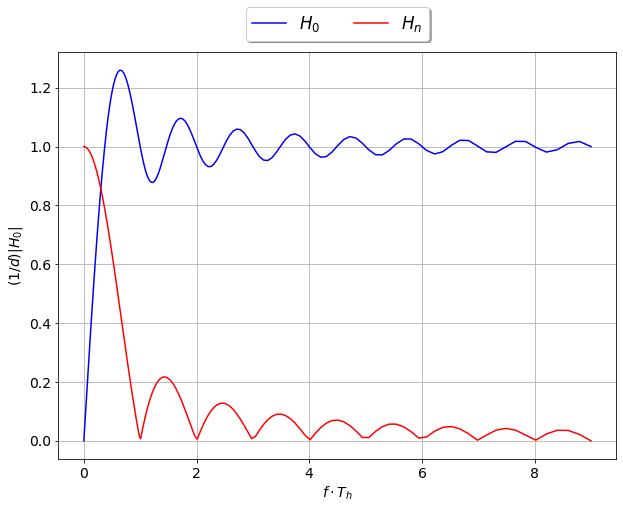

In [25]:
d = 0.9
fc = 5e6
Ts = 5/fc  
Th = d*Ts
f = np.logspace(-2, 7, num=900)
H_0_2 = d**2*((1-np.sin(2*np.pi*f*Th)/(2*np.pi*f*Th))**2 
              + ((1-np.cos(2*np.pi*f*Th))/(2*np.pi*f*Th))**2 )
H_n = d*np.sin(np.pi*f*Th)/(np.pi*f*Th)
plot_2xy(f*Th, (1/d)*np.sqrt(H_0_2), (1/d)*np.abs(H_n),
       r'$f\cdot T_h$', r'$(1/d)|H_0|$', r'$H_0$', r'$H_n$')

 - For frequencies much lower than the auto-zeroing clock frequency auto-zeroing effectively high-pass filters the noise, eliminating offset and significantly reducing $1/f$ noise

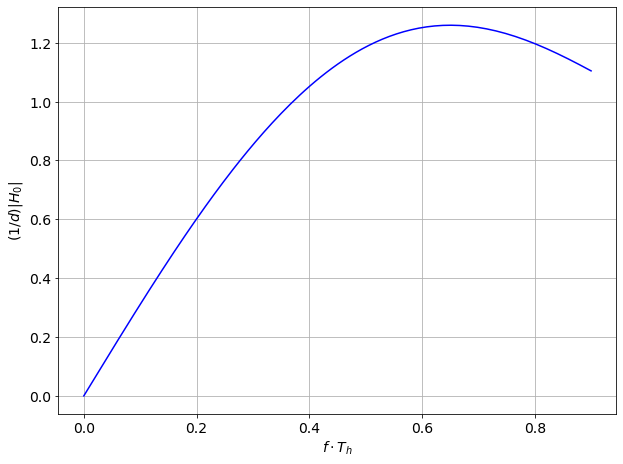

In [26]:
f = np.logspace(-2, 6, num=800)
H_0_2 = d**2*((1-np.sin(2*np.pi*f*Th)/(2*np.pi*f*Th))**2 
              + ((1-np.cos(2*np.pi*f*Th))/(2*np.pi*f*Th))**2 )
plot_xy(f*Th, (1/d)*np.sqrt(H_0_2),
       r'$f\cdot T_h$', r'$(1/d)|H_0|$')

## Autozeroed 1/f noise

 - For an opamp in unity-gain feedback (where $f_c = A_0\cdot f_{3dB}$), its band-limited $1/f$ noise can be expressed as

\begin{equation}
S_{N-1/f}(f) = \dfrac{S_0 f_k}{|f|\left[1+\left(\dfrac{f}{f_c}\right)^2\right]}
\end{equation}


 - The foldover component for the $1/f$ noise can be approximated in the Nyquist range by
 
\begin{equation}
S_{fold-1/f} \cong 2S_0 f_k T_s[1+\ln(\tfrac{2}{3}f_cT_s)]\cdot\text{sinc}^2(\pi f T_s))
\end{equation}

 - The PSD of the autozeroed noise is the sum of the baseband and foldover components
 
\begin{equation}
S_{AZ-1/f}(f) = |H_0(f)|^2S_{N-1/f}(f) + S_{fold-1/f}(f)
\end{equation}

 - The baseband component of the $1/f$ noise exhibits a zero at DC, while the aliased component has a $\text{sinc}(x)$ shape

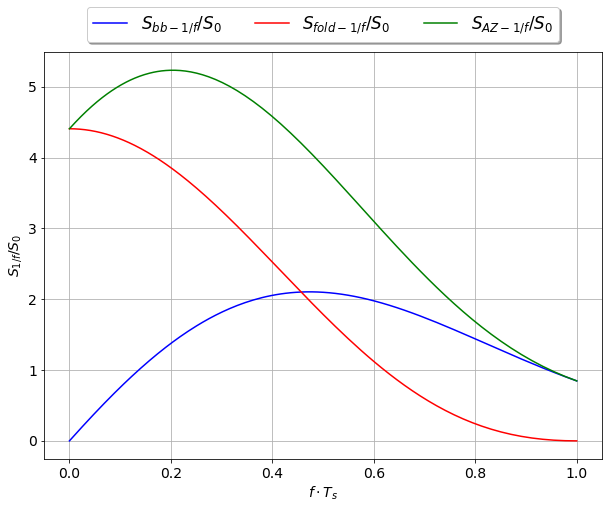

In [30]:
fk = 1/Ts
S_0 = 4*k*T*1e3
S_1_by_f = S_0*fk/f/(1+f/fc)**2
S_bb_1_by_f = (1/d)**2*H_0_2*S_1_by_f
S_fold_1_by_f = 2*S_0*fk*Ts*(1+np.log((2/3)*fc*Ts))*np.sinc(f*Ts)**2
S_AZ_1_by_f = S_bb_1_by_f + S_fold_1_by_f
plot_3xy(f*Ts, S_bb_1_by_f/S_0, S_fold_1_by_f/S_0, S_AZ_1_by_f/S_0,
         r'$f\cdot T_s$', r'$S_{1/f}/S_0$',
        r'$S_{bb-1/f}/S_0$', r'$S_{fold-1/f}/S_0$', r'$S_{AZ-1/f}/S_0$' )

## Autozeroed white noise

 - For broadband white noise with a PSD of $S_0$ and an equivalent noise bandwidth of  $f_{EBW} = \frac{\pi}{2}f_{c}$, the foldover component of the AZ noise is given by
 
\begin{equation}
\sum_{n=-\infty}^{\infty}S_N\left(f - \dfrac{n}{T_s}\right) \cong 2f_{EBW}T_sS_0 = \pi f_c T_s S_0
\end{equation}
 
 - The term $2f_{EBW}T_s$ is the *undersampling factor*, i.e. the ratio of the noise bandwidth to the Nyquist bandwidth of the sampling clock
 
 - If we assume that the undersampling factor $2f_{EBW}T_sS_0 = \pi f_c T_s S_0 \gg 1$, the foldover (aliased) component dominates and the autozeroed white noise can be approximated by
 
\begin{equation}
S_{AZ-white}(f) \cong S_{fold-white} = (\pi f_c T_s - 1)S_0\cdot\text{sinc}^2(\pi fT_s)
\end{equation}


 - As with the track-and-hold circuit previously discussed, broadband white noise is aliased and shaped by a $\text{sinc}(x)$ response
 
 - Also as with the track-and-hold circuit, the undersampling factor is typically high due to the need to settle during the sampling period, which leads to a tradeoff between $1/f$ noise and white noise

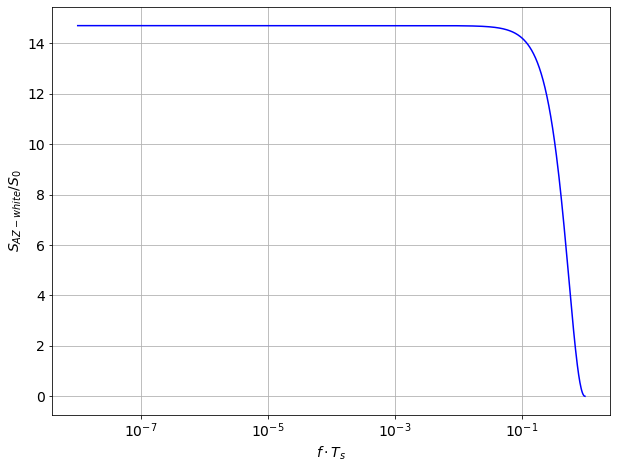

In [32]:
S_AZ_white = (np.pi*fc*Ts - 1)*S_0*np.sinc(f*Ts)**2
plot_logxy(f*Ts, S_AZ_white/S_0,
         r'$f\cdot T_s$', r'$S_{AZ-white}/S_0$')

## Switched-capacitor gain stage

<center><img src="img/SC_amplifier.png" width=600 /></center>

 - Another advantage of switched-capacitor architectures is reduced resistive loading of opamps 
 
 - An offset-compensated switched-capacitor gain stage is shown here
 
 - During $\phi_1$, $C_1$ is charged to $v_{in} - v_{os}$ and $C_2$ to $v_{os}$
 
 - During $\phi_2$, the signal charge $q_{sig} = -C_1v_{in}$ is transferred to $C_2$, resulting in a charge of $q_{out} = -C_2v_{os} - C_1v_{in}$
 
 - The output voltage is thus
 
\begin{equation}
v_{out}(\phi_2) = v_{os} - v_{os} - \dfrac{C_1}{C_2}v_{in} = -\dfrac{C_1}{C_2}v_{in} 
\end{equation}

## Chopper stabilization

<center><img src="img/chopper_modulation.png" width=1000 /></center>

 - Another technique for the suppression of low-frequency noise, *chopper stabilization*, utilizes *modulation* to transpose the amplifier input signal to a frequency beyond the $1/f$ corner frequency $f_k$
 
 - The input signal spectrum is processed at a higher frequency and demodulated back to baseband after amplification
 
 - In the figure, $v_{in}$ is 1) modulated (i.e. multiplied) by a square wave signal $m_1(t)$, 2) corrupted by noise and offset, 3) amplified by a gain $G(f)$, and 4) demodulated back to baseband to form $v_{out}$

## Chopper-modulated noise

 - The modulated noise consists of scaled replicas of the baseband noise at odd integer multiples of the modulator frequency 

\begin{equation}
S_{CS} = \left(\dfrac{2}{\pi}\right)^2\sum\limits_{\substack{n=-\infty \\ n\:\text{odd}}}^n \dfrac{1}{n^2}S_N\left(f - \dfrac{n}{T}\right)
\end{equation}

 - For white noise with a PSD of $S_0$, this results in a PSD at the chopper output given (assuming $f_cT\gg 1$) approximately by
 
\begin{equation}
S_{CS - white} \cong S_0\left[1 - \dfrac{\tanh\tfrac{\pi}{2}f_c T}{\tfrac{\pi}{2}f_c T} \right] \cong S_0
\end{equation}

 - The chopper-modulated $1/f$ noise can be approximated in the baseband by a white noise component given by
 
\begin{equation}
S_{CS-1/f}(f) \cong 0.8525 S_0 f_k T
\end{equation}

 - The PSD of the chopper modulated noise is thus
 
\begin{equation}
S_{CS} \cong S_0(1+0.8525f_k T)
\end{equation}

## Charge injection

<center><img src="img/MOS_charge_injection.png" width=600 /></center>

 - Assuming $V_d \approx V_s$ when $V_g = V_{DD}$ the NMOS switch is in triode and the channel contains a charge given by
 
\begin{align}
Q_{ch} &= \mu C_{ox} \dfrac{W}{L}(V_{gs} - V_{th}) \\
&= \mu C_{ox} \dfrac{W}{L}(V_{DD} - V_{in} - V_{th}) 
\end{align}

 - When the switch turns off, approximately half of this charge will remain on the sampling capacitance (depending on certain conditions), contributing an error to the sampled voltage given by
 
\begin{equation}
\Delta V = \dfrac{1}{2}\dfrac{Q_{ch}}{C_h}
\end{equation}
 
 - As $V_{in}$ changes, so does the error due to charge injection, which becomes a source of nonlinear distortion due to the nonlinearity of the switch resistance
 


## Channel charge distribution

 - The distribution of the channel charge during the ON-OFF transition of the switch depends on both 
     
     - The ratio of capacitance at the switch drain ($C_h$) to that at the source ($C_p$), and 
     
     - The slope of the clock signal applied to the gate
     
 - The channel charge is split equally between source and drain only if either 
 
    - $C_h$ and $C_p$ are equal, or
    
    - The clock transition time is much less than the $R_{on}C$ time constant
    
 - For slowly falling clock signals, the channel charge will be split unequally between source and drain, favoring the terminal with the lower impedance
 
 - As a result, the charge injection error is difficult to predict, but there are several circuit techniques that can reduce the effect of charge injection

## Dummy switch

<center><img src="img/MOS_dummy_switch.png" width=800 /></center>

 - One method of alleviating the effect of charge injection is to include a "dummy" switch, with source and drain terminals shorted, in series with the sampling switch 
 
 - $M_2$ is sized such that $(W/L)_2 = \frac{1}{2}(W/L)_1$, making its channel charge equal to half of $M_1$'s
 
 - When $\phi$ goes low, $M_1$ turns off and half of its channel charge is injected onto the capacitor
 
 - $M_2$'s gate voltage, $\overline{\phi}$, is complementary to that of $M_1$, and slightly delayed
 
 - When $\overline{\phi}$ goes high, $M_2$'s channel charge is drawn from the capacitor, removing the charge injection error voltage
 
 - Note that this technique requires of fast-transitioning clock signals


## Differential structures

<center><img src="img/differential_sampling.png" width=600 /></center>

 - A fully differential structure offers the possibility of processing charge injection as a common-mode signal 
 
 - If $V_{in+}$ and $V_{in-}$ are close to ground, the channel charge of both switches is given approximately by
 
\begin{equation}
Q_{ch+} \approx Q_{ch-} \approx \mu C_{ox} \dfrac{W}{L}(V_{DD} - V_{th}) 
\end{equation}

 - The differential output voltage is thus given approximately by
 
\begin{align}
V_{od} &= V_{out+} - V_{out-} \\
&\approx V_{in+} - V_{in-} + Q_{ch+}/C_h - Q_{ch-}/C_h\\
&\approx V_{in+} - V_{in-}
\end{align}

 - However, for large differential signals the channel charges will exhibit significant mismatch due to the dependence of $Q_{ch}$ on the source potential(s)

## Bottom-plate sampling

<center><img src="img/bottom_plate_sampling.png" width=600 /></center>

 - Bottom-plate sampling is a technique employed to ensure that the error caused by charge injection is signal-independent, converting a nonlinear error into an offset (this is preferable)
 
 - In this configuration, $\phi_1$ goes low before $\phi_2$ so that the charge injection onto $C$ is constant, due to the connection to ground
 
 - This ensures that the voltage error is an offset, rather than nonlinear distortion
 
 - When $\phi_2$ goes low, its channel charge flows toward the low impedance of the source $V_{in}$ instead of the capacitor (because $\phi_1$ is low at that time)

## Clock feedthrough

<center><img src="img/clock_feedthrough.png" width=700 /></center>

 - Another source of error in sampled-data circuits is due to the capacitive coupling of the clock signal through the gate-drain overlap capacitance of the switch $C_{ov}$
 
 - As the clock begins to transition from $V_{DD}$, initially the feedthrough current is compensated by the transistor drain current
 
 - The transistor stops conducting when $V_{gs} = V_{g} - V_{in} = V_{th}$, corresponding to a gate voltage of
 
\begin{equation}
V_g = V_{in} + V_{th}
\end{equation}
 
 - Thus, an error voltage develops on $C_h$ given by
 
\begin{equation}
\Delta V = \dfrac{C_{ov}}{C_h + C_{ov}}(V_{in} + V_{th})
\end{equation}

 - As the clock transition time approaches zero, very little of the feedthrough current is compensated by the drain current and the majority goes through the coupling capacitance
 
 - In this case, the error voltage due to feedthrough is given approximately by
 
\begin{equation}
\Delta V = \dfrac{C_{ov}}{C_h + C_{ov}}V_{DD}
\end{equation} 

 - Here we see an advantage to slowing down the clock transition speed, particularly for small input signals and if $V_{DD} \gg V_{th}$ 
 
 - However, slowing down the fall time of the clock may conflict with the goal of minimizing charge injection through the use of dummy switches, as this technique relies on the channel charge splitting evenly between source and drain)
 
 - Smaller switches and larger values of $C_h$ reduce the magnitude of clock feedthrough errors, though this comes at the expense of speed

## Leakage current

<center><img src="img/leakage_current.png" width=800 /></center>

 - During the hold period $T_h$, charge is removed from the capacitor via the reverse-bias leakage current of the drain-bulk junction, resulting in a voltage error given by
 
\begin{equation}
\Delta V_{leak} = \dfrac{I_{leak}T_h}{C_h}
\end{equation}
 
 - This source of error increases with $T_h$, and is exacerbated at high temperatures due to the temperature dependence of $I_{leak}$ (which doubles with every $10^{\circ}C$ increase in temperature)
 
 - As with other sources of error, the effect of leakage current is reduced by an increase in $C_h$ (though leakage errors are typically less significant than other types of error)

## Summary

 - MOS operational amplifiers are attractive due to their high input impedance and low input current noise, but they suffer from significant $1/f$ noise and input voltage offset
 
 - Autozeroing (AZ) is one means of alleviating these sources of error, trading a decrease in input offset and $1/f$ noise for an increase in white noise spectral density in the Nyquist band
 
 - AZ can be incorporated into a number of switched-capacitor gain and filter structures, improving precision while taking advantage of the properties of switched-capacitor structures (i.e. device matching and reduced amplifier loading)
 
 - Discrete-time analog circuit architectures employ CMOS switches which, in addition to thermal noise, exhibit errors due to charge injection, clock feedthrough, and leakage
 
 - All four types of error are minimized by the use of larger sampling capacitors, indicating a tradeoff between speed and precision